In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)

# Load house prices data

In [2]:
df = pd.read_csv('home_data.csv')
type(df)
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [3]:
data = df.drop(['id','date'], axis = 1)

# Data Exploration and Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


#### It appears that there is no missing data 

In [5]:
pd.set_option('float_format', '{:f}'.format)
data['price'].describe()

count     21613.000000
mean     540088.141905
std      367127.195968
min       75000.000000
25%      321950.000000
50%      450000.000000
75%      645000.000000
max     7700000.000000
Name: price, dtype: float64

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540088.141905,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,367127.195968,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Explore the distribution of the data

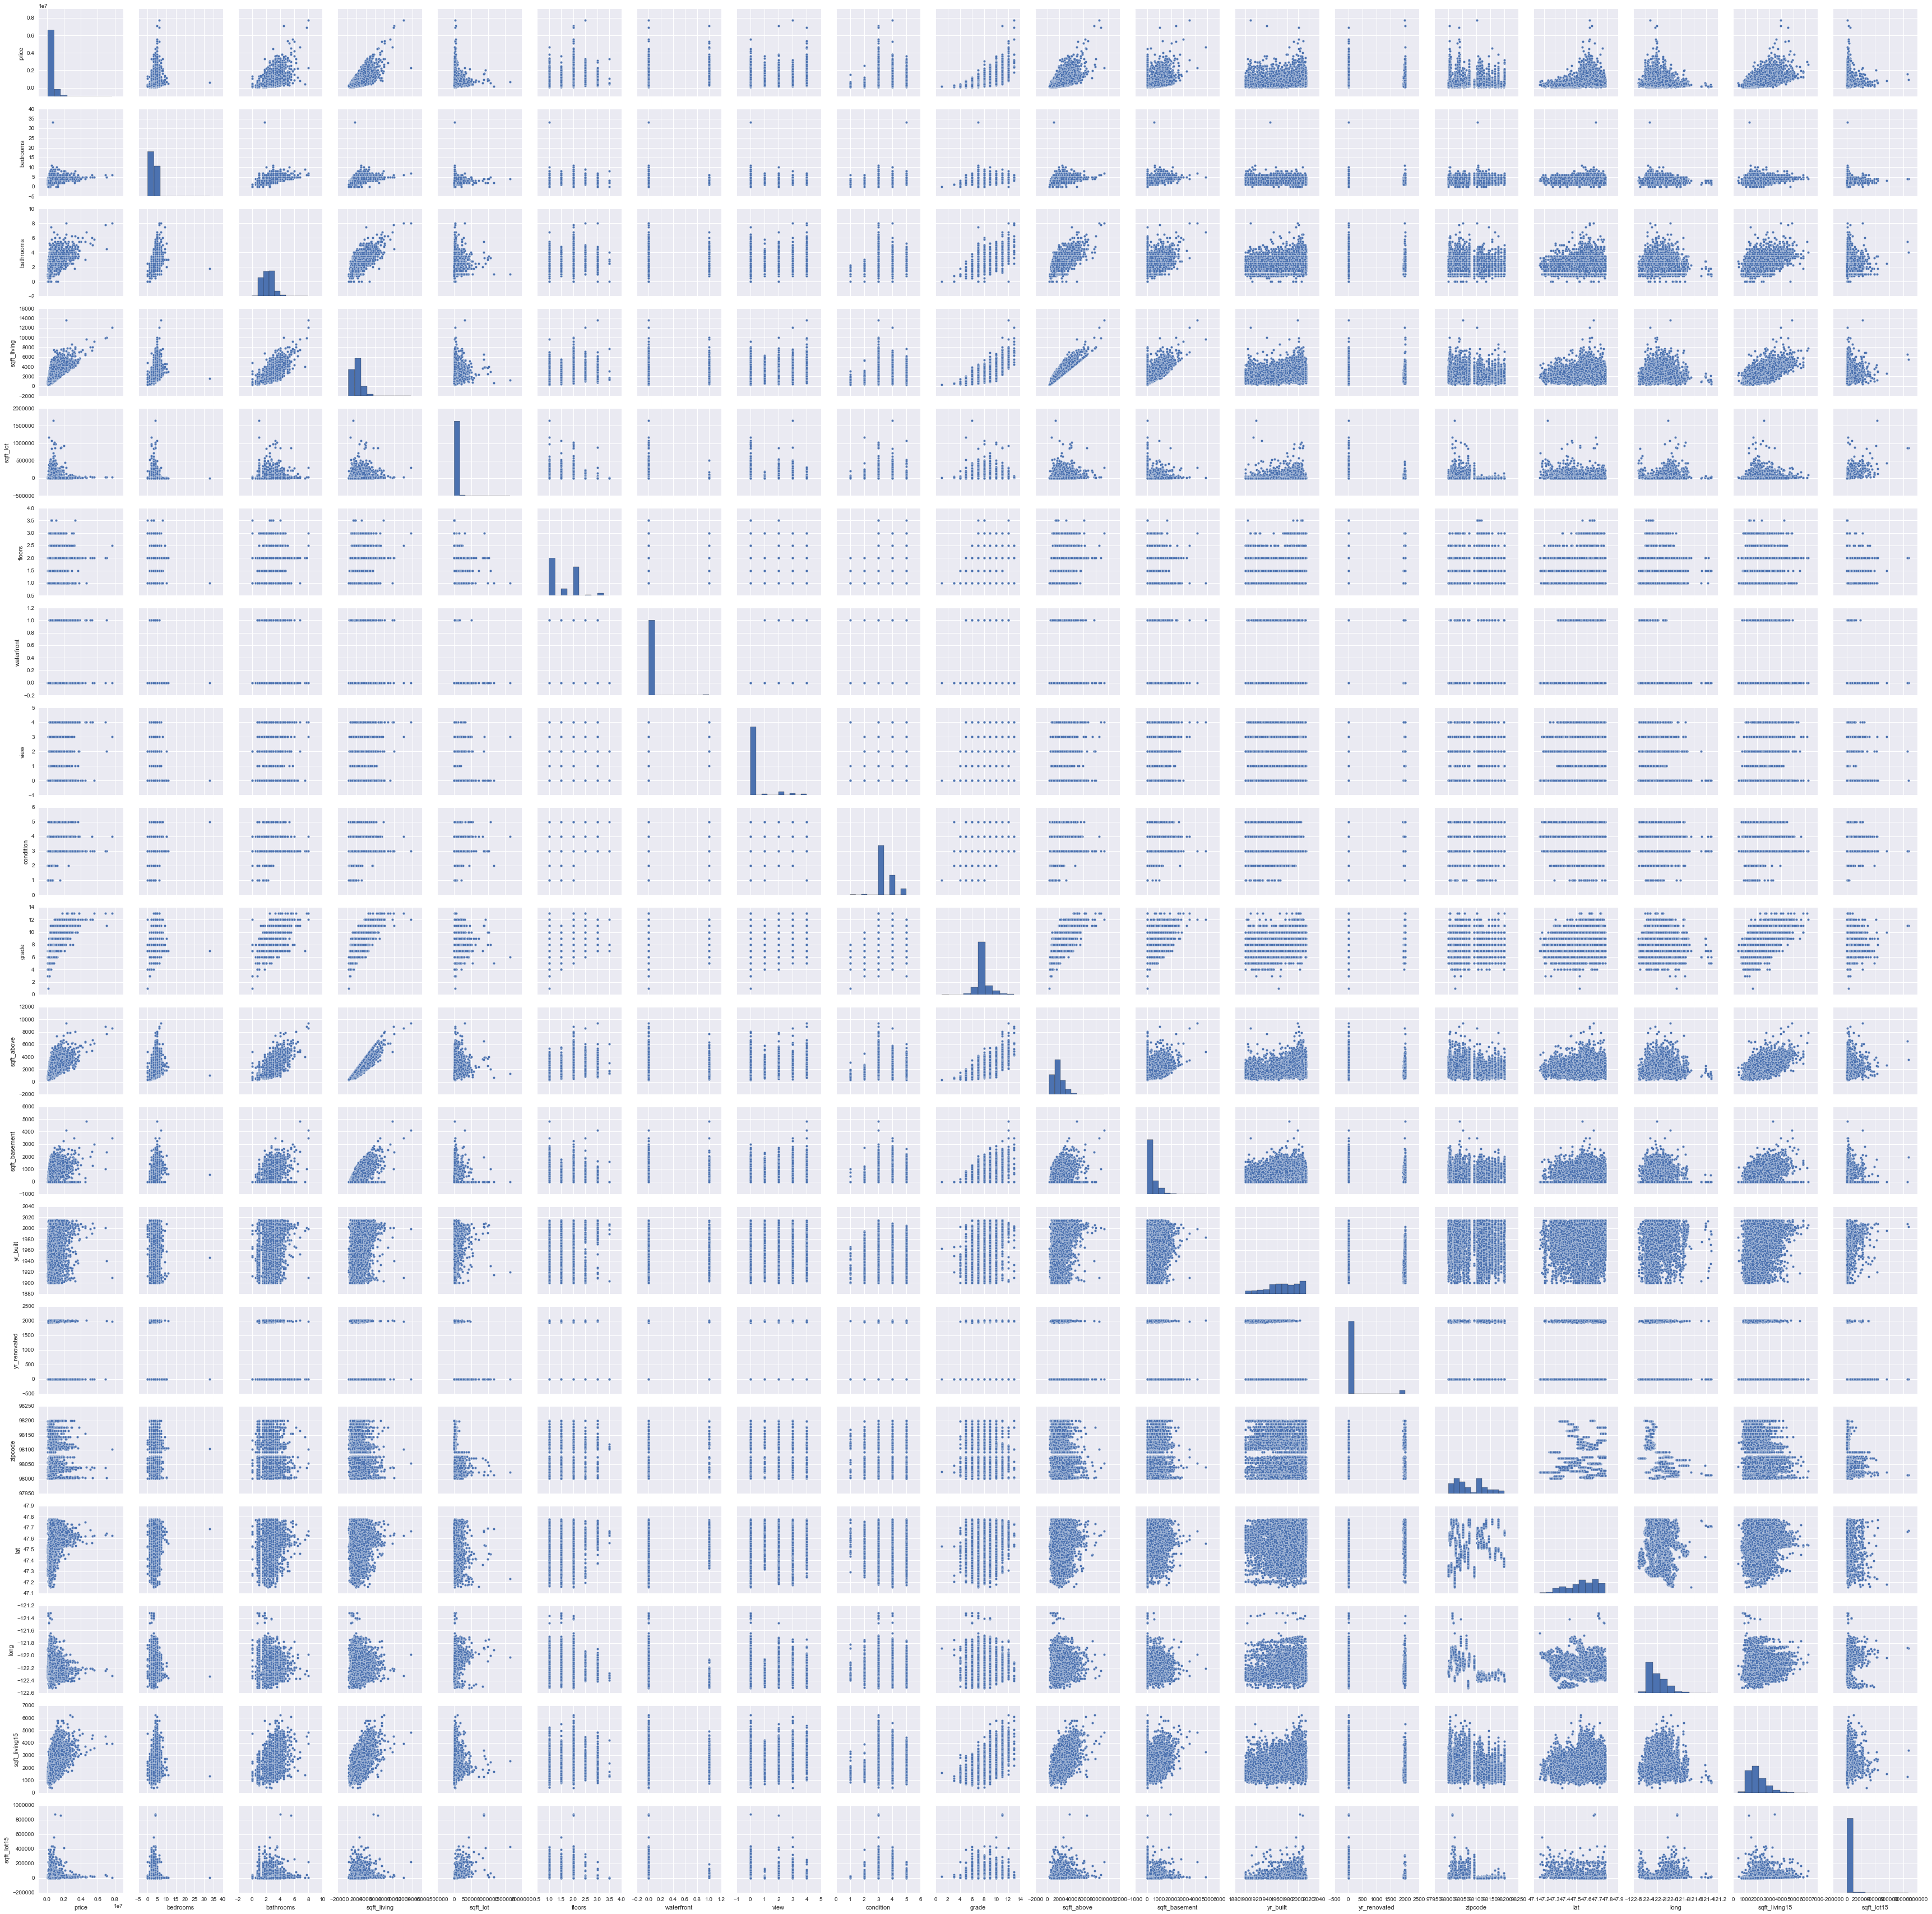

In [7]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187404B5860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001874377B7B8>]], dtype=object)

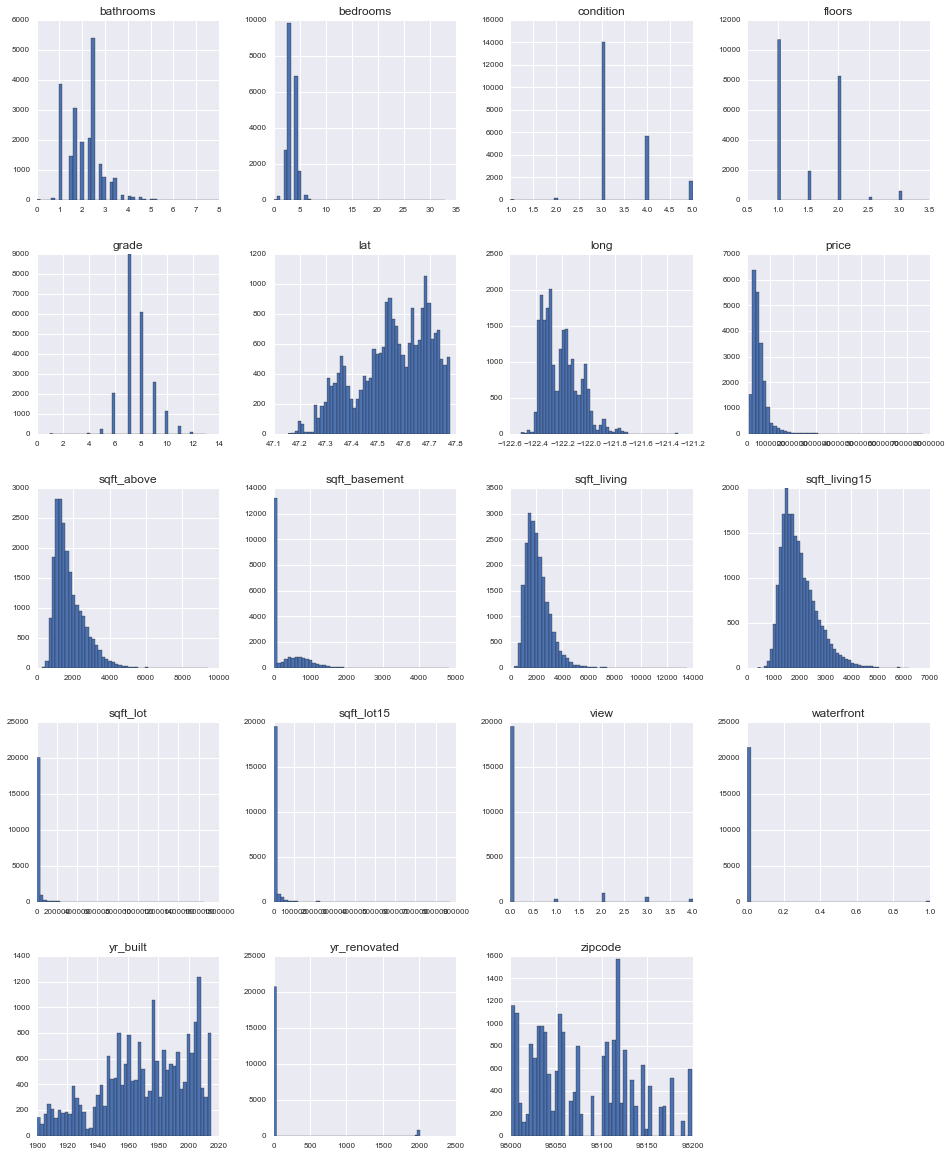

In [8]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Explore the distribution of houses prices closely

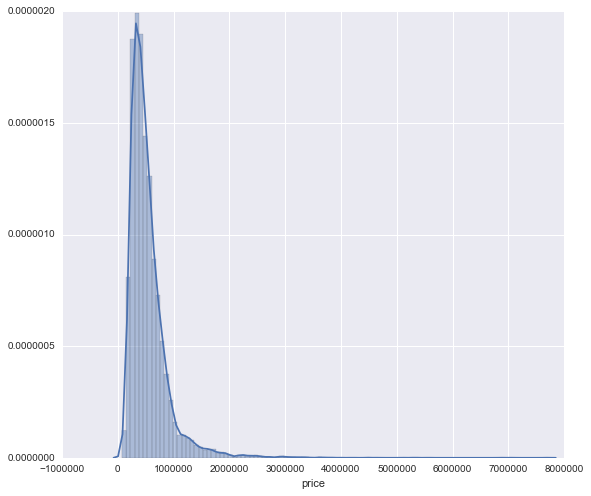

In [9]:
plt.figure(figsize = (9,8))
sns.distplot(data['price'], bins =100, hist_kws={'alpha': 0.4})

#### the house distribution is skewed to the right 
#### most data is smaller the mean price 

## Correlation

In [11]:
data_corr = data.corr()['price']
data_corr

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

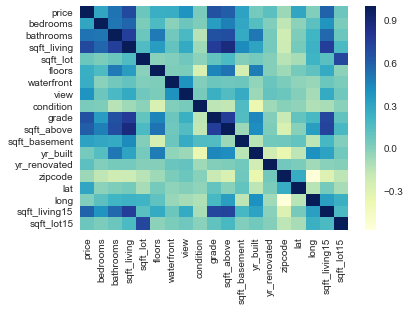

In [12]:
sns.heatmap(data.corr(), cmap = "YlGnBu")

### There is a strong positive correlation betwean sqf_living and price 
#### corr = 0.702035